## Data Preprocessing & Implementation

Load the BankChurners.csv dataset and perform K-Means clustering with k = 5
clusters using three different initialization methods: ‘k-means++’, ‘random’, and
Bisecting K-Means.

• Load the dataset and select relevant numerical features (at least 4-5 features)
• Standardize the features using StandardScaler
• Apply all three initialization methods and display the cluster centers for each

In [1]:
import pandas as pd

In [25]:
df = pd.read_csv('BankChurners.csv')

In [26]:
df = df[["Customer_Age","Months_on_book" , "Credit_Limit" ,"Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1" , "Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2"]]

In [27]:
from sklearn.preprocessing import StandardScaler

sd = StandardScaler()
df= sd.fit_transform(df)

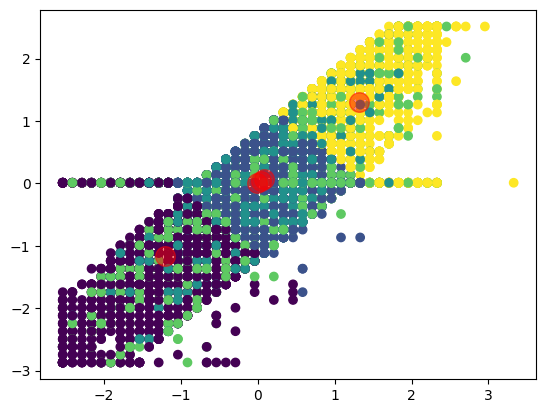

In [28]:
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt


# Initialize KMeans with k clusters
kmeans = KMeans(n_clusters=5, random_state=42)
# Fit the model
kmeans.fit(df)
# Predict the cluster labels
y_kmeans = kmeans.predict(df)
# Get the cluster centers
centroids = kmeans.cluster_centers_
# Plot the data points and centroids
plt.scatter(df[:, 0], df[:, 1], c=y_kmeans, cmap='viridis')
plt.scatter(centroids[:, 0], centroids[:, 1], c='red', s=200, alpha=0.5)
plt.show()

In [29]:
df = pd.read_csv('BankChurners.csv')


In [30]:
numerical_features = ['Customer_Age', 'Credit_Limit', 'Total_Trans_Amt', 'Total_Trans_Ct', 'Avg_Utilization_Ratio']
X = df[numerical_features]

In [31]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

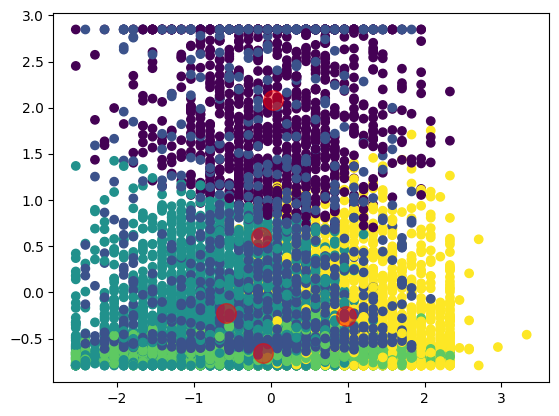

In [32]:
kmeans_random = KMeans(n_clusters=5, init='random', random_state=42, n_init='auto')
kmeans_random.fit(X_scaled)
y_kmeans = kmeans_random.predict(X_scaled)
centroids = kmeans_random.cluster_centers_



plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=y_kmeans, cmap='viridis')
plt.scatter(centroids[:, 0], centroids[:, 1], c='red', s=200, alpha=0.5)
plt.show()

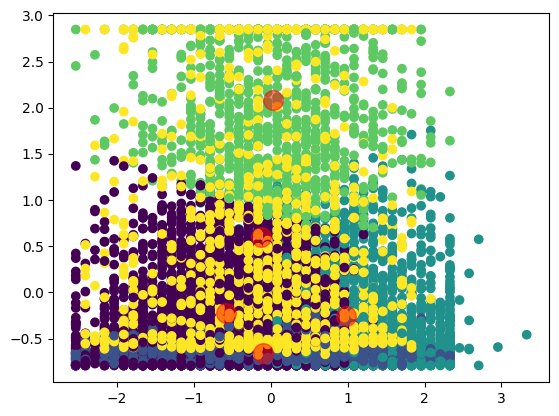

In [33]:
kmeans_plusplus = KMeans(n_clusters=5, init='k-means++', random_state=42, n_init='auto')
kmeans_plusplus.fit(X_scaled)
y_kmeans_plusplus = kmeans_plusplus.predict(X_scaled)
centroids_plusplus = kmeans_plusplus.cluster_centers_

plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=y_kmeans_plusplus, cmap='viridis')
plt.scatter(centroids_plusplus[:, 0], centroids_plusplus[:, 1], c='red', s=200, alpha=0.5)
plt.show()

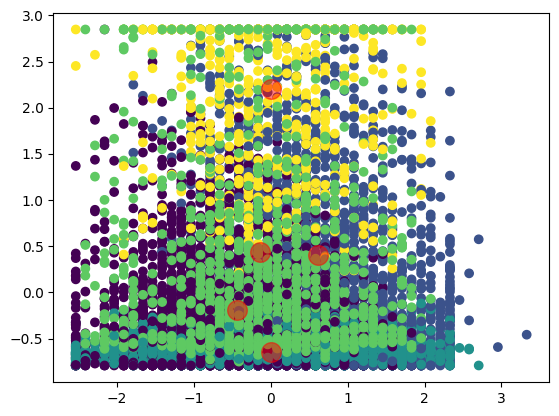

In [45]:
bisecting_kmeans = BisectingKMeans(n_clusters=5, random_state=42, n_init=5)
bisecting_kmeans.fit(X_scaled)
y_bisecting = bisecting_kmeans.predict(X_scaled)
centroids_bisecting = bisecting_kmeans.cluster_centers_

plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=y_bisecting, cmap='viridis')
plt.scatter(centroids_bisecting[:, 0], centroids_bisecting[:, 1], c='red', s=200, alpha=0.5)
plt.show()


In [41]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)

X_new = pca.fit_transform(X_scaled)

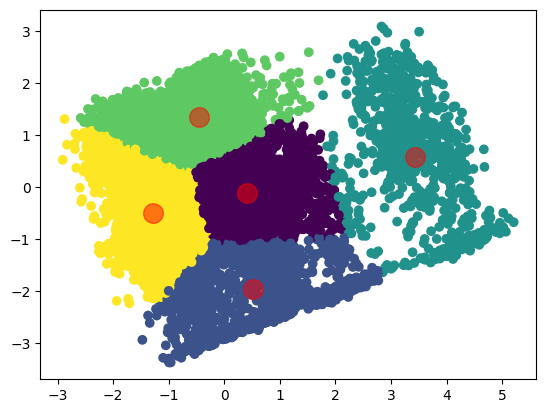

In [43]:
kmeans_random = KMeans(n_clusters=5, init='random', random_state=42, n_init='auto')
kmeans_random.fit(X_new)
y_kmeans = kmeans_random.predict(X_new)
centroids = kmeans_random.cluster_centers_



plt.scatter(X_new[:, 0], X_new[:, 1], c=y_kmeans, cmap='viridis')
plt.scatter(centroids[:, 0], centroids[:, 1], c='red', s=200, alpha=0.5)
plt.show()

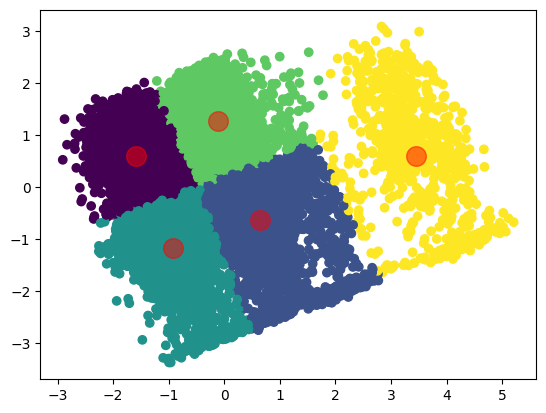

In [44]:
kmeans_plus = KMeans(n_clusters=5, init='k-means++', random_state=42, n_init='auto')
kmeans_plus.fit(X_new)
y_plus = kmeans_plus.predict(X_new)
centroids = kmeans_plus.cluster_centers_



plt.scatter(X_new[:, 0], X_new[:, 1], c=y_plus, cmap='viridis')
plt.scatter(centroids[:, 0], centroids[:, 1], c='red', s=200, alpha=0.5)
plt.show()

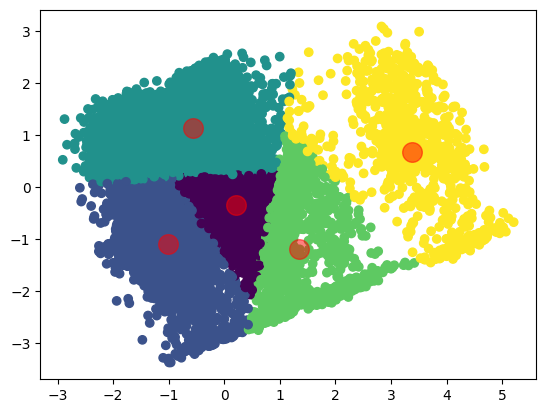

In [46]:
bisecting_kmeans = BisectingKMeans(n_clusters=5, random_state=42, n_init=5)
bisecting_kmeans.fit(X_new)
y_bisecting = bisecting_kmeans.predict(X_new)
centroids_bisecting = bisecting_kmeans.cluster_centers_

plt.scatter(X_new[:, 0], X_new[:, 1], c=y_bisecting, cmap='viridis')
plt.scatter(centroids_bisecting[:, 0], centroids_bisecting[:, 1], c='red', s=200, alpha=0.5)
plt.show()


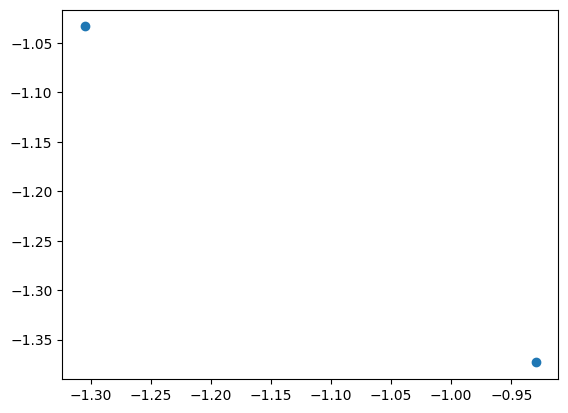

In [47]:
plt.scatter(X_new[:][0] , X_new[:][1])

/tmp/ipykernel_12540/1443193549.py:25: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot([random_results['inertia'], kmeans_plus_plus_results['inertia']],labels=['Random', 'k-means++'])


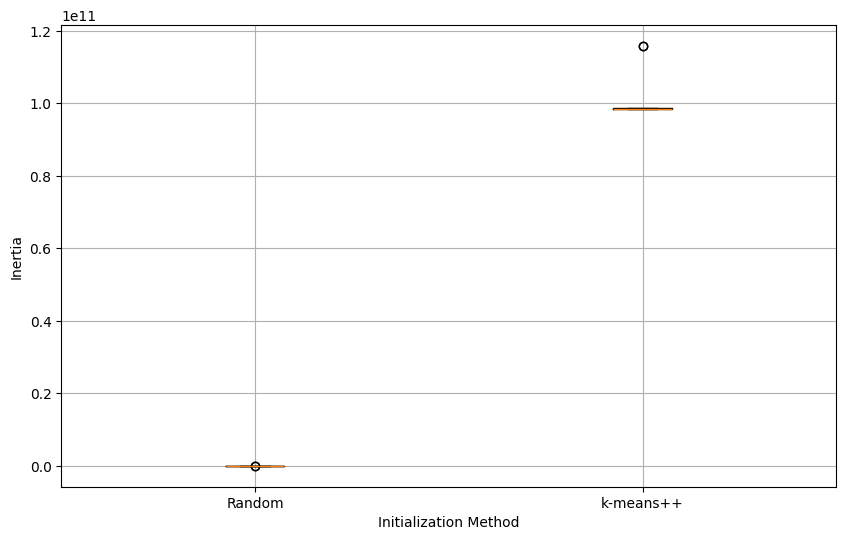

In [40]:
random_results = {'inertia': [], 'n_iter': []}
kmeans_plus_plus_results = {'inertia': [], 'n_iter': []}

for i in range(10):
    kmeans_random = KMeans(n_clusters=5,init='random',n_init=1,random_state=i ,max_iter=300)
    kmeans_random.fit(X_scaled)
    random_results['inertia'].append(kmeans_random.inertia_)
    random_results['n_iter'].append(kmeans_random.n_iter_)

for i in range(10):
    kmeans_plus_plus = KMeans(n_clusters=5,init='k-means++',n_init=1,  random_state=i,max_iter=300)
    kmeans_plus_plus.fit(X)
    kmeans_plus_plus_results['inertia'].append(kmeans_plus_plus.inertia_)
    kmeans_plus_plus_results['n_iter'].append(kmeans_plus_plus.n_iter_)

mean_inertia_random = np.mean(random_results['inertia'])
std_inertia_random = np.std(random_results['inertia'])
mean_n_iter_random = np.mean(random_results['n_iter'])

mean_inertia_kmeans_plus_plus = np.mean(kmeans_plus_plus_results['inertia'])
std_inertia_kmeans_plus_plus = np.std(kmeans_plus_plus_results['inertia'])
mean_n_iter_kmeans_plus_plus = np.mean(kmeans_plus_plus_results['n_iter'])

plt.figure(figsize=(10, 6))
plt.boxplot([random_results['inertia'], kmeans_plus_plus_results['inertia']],labels=['Random', 'k-means++'])
# plt.title('Inertia Distribution for Random vs. k-means++ Initialization (10 runs)')
plt.ylabel('Inertia')
plt.xlabel('Initialization Method')
plt.grid(True)
plt.show()

